#### Training Dataset

In [33]:
data = pd.read_csv(r"D:\DataScience\02 INEURON\ML_Projects\Internal Projects (Practicing)\Work\Masters Projects\Thyroid Detection\Tyroid Project\Files_Storage\DataSets\Training\training_Hypothyroid.csv")

<IPython.core.display.Javascript object>

In [34]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'hypothyroid'],
      dtype='object')

In [36]:
data = data[SelectedFeatures]

In [38]:
nullIndices = data.index[(data.isnull().sum(axis=1)) / len(data.columns) > 0.7]
nullColumns = data.columns[data.isnull().sum() / len(data) > 0.7]
nullColumns

Index([], dtype='object')

In [40]:
syntaxVal = "?"
syntaxErrors = data.isin([syntaxVal]).sum()
syntaxErrors_cols = pd.DataFrame(syntaxErrors[syntaxErrors > 0]).T
syntaxErrors_cols

<IPython.core.display.Javascript object>

,age,TSH,T4U,FTI,T3,TT4,sex
0,1,369,387,385,769,231,150


In [41]:
for col in syntaxErrors_cols.columns:
    syntaxIndex = data[data[col] == syntaxVal].index
    data.loc[syntaxIndex, col] = np.nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
nullValues = data.isin([np.nan]).sum()
nullValues_cols = pd.DataFrame(nullValues[nullValues > 0]).T
nullValues_cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,age,TSH,T4U,FTI,T3,TT4,sex
0,1,369,387,385,769,231,150


In [46]:
data = data.fillna(method='bfill')
data = data.fillna(method='ffill')

In [49]:
CategoricalFeatures = ['on_thyroxine', 'query_hypothyroid', 'sex', 'query_hyperthyroid', 'thyroid_surgery', 'tumor', 'hypothyroid']
categoricalFeatures = CategoricalFeatures.copy()

In [19]:
if "hypothyroid" in data.columns:
    data["hypothyroid"] = data["hypothyroid"].map({'negative': 0, 'compensated_hypothyroid': 1, 'primary_hypothyroid': 1, 'secondary_hypothyroid': 1})

In [58]:
[(if ((val=="N") | (val=="negative")) 0 1) for val in data["hypothyroid"]]

SyntaxError: invalid syntax (<ipython-input-58-5723cb727bca>, line 1)

In [63]:
data["hypothyroid"] = [0 if ((val=="N") | (val=="negative")) else 1 for val in data["hypothyroid"] ]

In [65]:
data["sex"] = data["sex"].map({"F": 0, "M": 1})

In [73]:
data.head()

,age,TSH,T4U,FTI,T3,TT4,on_thyroxine,query_hypothyroid,sex,query_hyperthyroid,thyroid_surgery,tumor,hypothyroid,hypothyroid1
0,41,1.3,1.14,109,2.5,125,0,0,0,0,0,0,1,1
1,23,4.1,0.91,120,2,102,0,0,0,0,0,0,1,1
2,46,0.98,0.91,120,1.9,109,0,0,1,0,0,0,1,1
3,70,0.16,0.87,70,1.9,175,1,0,0,0,0,0,1,1
4,70,0.72,0.87,70,1.2,61,0,0,0,0,0,0,1,1


In [67]:
CategoricalFeatures = ['on_thyroxine', 'query_hypothyroid', 'sex', 'query_hyperthyroid', 'thyroid_surgery', 'tumor', 'hypothyroid']
categoricalFeatures = CategoricalFeatures.copy()


In [70]:
categoricalFeatures.remove('sex')
categoricalFeatures.remove("hypothyroid")
categoricalFeatures

['on_thyroxine',
 'query_hypothyroid',
 'query_hyperthyroid',
 'thyroid_surgery',
 'tumor']

In [72]:
for feature in categoricalFeatures:
    data[feature] = data[feature].map({"f": 0, "t": 1})

In [75]:
import pandas as pd
data = data.apply(pd.to_numeric)

In [76]:
data.dtypes

age                     int64
TSH                   float64
T4U                   float64
FTI                   float64
T3                    float64
TT4                   float64
on_thyroxine            int64
query_hypothyroid       int64
sex                     int64
query_hyperthyroid      int64
thyroid_surgery         int64
tumor                   int64
hypothyroid             int64
hypothyroid1            int64
dtype: object

In [2]:
CategoricalFeatures = ["potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop", "went_on_backorder"]
NumericalFeatures = ["national_inv", "lead_time", "in_transit_qty", "forecast_3_month", "forecast_6_month", "forecast_9_month",
                                  "sales_1_month", "sales_3_month", "sales_6_month", "sales_9_month", "min_bank", "pieces_past_due",
                                  "perf_6_month_avg", "perf_12_month_avg", "local_bo_qty"]
SelectedFeatures_for_backorder = ["national_inv", "lead_time", "in_transit_qty", "forecast_9_month", "sales_9_month", "perf_6_month_avg",  "min_bank", "pieces_past_due", "local_bo_qty",
                                               "deck_risk", "ppap_risk", "stop_auto_buy", "went_on_backorder"
                                               ]
SelectedFeatures_for_minbank = ["national_inv", "perf_6_month_avg", "lead_time", "in_transit_qty",
                                             'potential_issue', 'pieces_past_due', 'local_bo_qty', 'sales_3_month',
                                             "forecast_6_month", 'deck_risk', 'oe_constraint', 'ppap_risk',
                                             'stop_auto_buy', 'rev_stop']

In [5]:
print(list(set(SelectedFeatures_for_minbank ) - set(CategoricalFeatures)))

['pieces_past_due', 'in_transit_qty', 'local_bo_qty', 'sales_3_month', 'perf_6_month_avg', 'lead_time', 'forecast_6_month', 'national_inv']


In [1]:
class GlobalVariablesPath:
    def __init__(self):
        self.filesPath = {"dataSet"         : "Files_Storage/DataSet/",
                          "trainingFile"    : "Files_Storage/Training/Training_BOP.csv",
                          "testingFile"     : "Files_Storage/Testing/Testing_BOP.csv",
                          "PickleFiles"     : "Files_Storage/PickleFiles/",
                          "Figures"         : "Files_Storage/Figures"
                          }

        self.syntaxErrorVal = -99
        self.CategoricalFeatures = ["potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop", "went_on_backorder"]
        self.NumericalFeatures = ["national_inv", "lead_time", "in_transit_qty", "forecast_3_month", "forecast_6_month", "forecast_9_month",
                                  "sales_1_month", "sales_3_month", "sales_6_month", "sales_9_month", "min_bank", "pieces_past_due",
                                  "perf_6_month_avg", "perf_12_month_avg", "local_bo_qty"]
        self.ValuesOfCategorical = ["No", "Yes"]
        self.SelectedFeatures = ["stop_auto_buy", "lead_time", "deck_risk", "perf_6_month_avg", "ppap_risk", "national_inv", "forecast_9_month",
                                 "sales_9_month", "local_bo_qty", "pieces_past_due", "min_bank", "in_transit_qty", "went_on_backorder"
                                 ]
        self.ColNames = ["sku", "potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop",
                         "went_on_backorder", "national_inv", "lead_time", "in_transit_qty", "forecast_3_month", "forecast_6_month",
                         "forecast_9_month", "sales_1_month", "sales_3_month", "sales_6_month", "sales_9_month", "min_bank", "pieces_past_due",
                         "perf_6_month_avg", "perf_12_month_avg","local_bo_qty"
                         ]
        self.MySQL_Variables = {"host": 'localhost',
                                "user": "root",
                                "pwd": "password",
                                "database": "backorderproduct",
                                "trainingTable": "training_BOP",
                                "testingTable": "testing_BOP"
                                }


In [2]:

from mysql import connector
import pandas as pd

# from GlobalVariables.GlobalVariables import GlobalVariablesPath

class MySQL_DB:
    def __init__(self):
        self.GVP = GlobalVariablesPath()

    # Connecting to MySQL --------------------------------------------
    def connect_to_MySQL(self):
        MySQL = connector.connect(host= self.GVP.MySQL_Variables["host"],
                                  user=self.GVP.MySQL_Variables["user"],
                                  password=self.GVP.MySQL_Variables["pwd"]
                                  )
        SQL_Cursor = MySQL.cursor()
        return MySQL, SQL_Cursor

    # Connecting to database ------------------------------------------
    def connect_to_database(self, DB_Name):
        MyDB = connector.connect(host= self.GVP.MySQL_Variables["host"],
                                 user=self.GVP.MySQL_Variables["user"],
                                 password=self.GVP.MySQL_Variables["pwd"],
                                 database=DB_Name
                                 )
        DB_Cursor = MyDB.cursor()
        return MyDB, DB_Cursor

    # Returns list of database names available in MySQL
    def list_of_databases(self):
        MySQL, SQL_Cursor = self.connect_to_MySQL()
        SQL_Cursor.execute("SHOW DATABASES")
        dataBaseNames = [x[0] for x in SQL_Cursor]
        MySQL.close()
        return dataBaseNames

    # Returns list of table names available in database
    def list_of_tables_in_DB(self, DB_Name):
        MyDB, DB_Cursor = self.connect_to_database(DB_Name)
        DB_Cursor.execute("SHOW TABLES")
        tableNames = [x[0] for x in DB_Cursor]
        MyDB.close()
        return tableNames

    def create_DB(self, DB_Name):
        MySQL, SQL_Cursor = self.connect_to_MySQL()
        if DB_Name not in self.list_of_databases():
            query = "CREATE DATABASE " + DB_Name
            SQL_Cursor.execute(query)
            print(f"Database '{DB_Name}' is created successfully")
        else:
            print(f"Database '{DB_Name}' already exists")
        MySQL.close()

    def drop_DB(self, DB_Name):
        MySQL, SQL_Cursor = self.connect_to_MySQL()
        if DB_Name in self.list_of_databases():
            query = "DROP DATABASE " + DB_Name
            SQL_Cursor.execute(query)
            print(f"Database '{DB_Name}' is dropped successfully")
        else:
            print(f"Database '{DB_Name}' doesn't exist")
        MySQL.close()

    def create_table_in_DB(self, DB_Name, Table_Name, Columns):
        MyDB, DB_Cursor = self.connect_to_database(DB_Name)
        # Creating the table if table doesn't present in database
        if Table_Name not in self.list_of_tables_in_DB(DB_Name):
            query = "CREATE TABLE " + Table_Name + " " + Columns
            print(query)
            DB_Cursor.execute(query)
            print(f"Table '{Table_Name}' is created successfully in the database '{DB_Name}'")

        # Dropping the table and agian creating if table presents in database
        else:
            print(f"Table '{Table_Name} already exists in the database '{DB_Name}'")
            self.drop_table_in_DB(DB_Name, Table_Name)
            self.create_table_in_DB(DB_Name, Table_Name, Columns)
        MyDB.close()

    def drop_table_in_DB(self, DB_Name, Table_Name):
        MyDB, DB_Cursor = self.connect_to_database(DB_Name)
        if Table_Name in self.list_of_tables_in_DB(DB_Name):
            query = "DROP TABLE " + Table_Name
            DB_Cursor.execute(query)
            print(f"Table '{Table_Name}' is dropped successfully from the database '{DB_Name}'")
        else:
            print(f"Table '{Table_Name} doesn't exist in the database '{DB_Name}'")
        MyDB.close()

    def create_table_as_dataframe(self, df, DB_Name, Table_Name):
        data = pd.DataFrame(df.dtypes).T
        Columns = "("
        for col in data.columns:
            val = data.loc[0, col]
            if val == "datetime64[ns]":
                dType = "datetime"
            elif val == "int64":
                dType = "int"
            elif val == "float64":
                dType = "float"
            elif val == "object":
                dType = "varchar(255)"
            Columns = Columns + col + " " + dType + ", "
        Columns = Columns[0:-2] + ")"
        self.create_table_in_DB(DB_Name, Table_Name, Columns)

    def load_data_from_dataframe_to_table(self, df, DB_Name, Table_Name):
        self.create_table_as_dataframe(df, DB_Name, Table_Name)  # Creating table in DB

        # --------------------------------- Extracting column names as tuples
        columnNames = "("
        for col in BOP_training.columns:
            columnNames = columnNames + str(col) + ", "
        columnNames = columnNames[0:-2] + ")"

        # --------------------------------- Creating values type for insert values
        string = "("
        for i in range(len(tuple(df.columns))):
            string = string + "%s, "
        string = string[0:-2] + ")"


        # --------------------------------- Extracting values as tuples
        arrayValues = df.values
        
        startValue = 0
        endValue = 1000
        for i in range(1, round(len(arrayValues)/1000)+1):
            records_to_insert = arrayValues[startValue:endValue]            
            records_to_insert = [tuple(records_to_insert[i]) for i in range(len(records_to_insert))]

            # --------------------------------- SQL Query
            SQL_Query = "INSERT INTO customers " + columnNames + " VALUES " + string
            # --------------------------------- Connecting to database
            MyDB, DB_Cursor = self.connect_to_database(DB_Name)
            # --------------------------------- Inserting Records into SQL table
            try:
                DB_Cursor.executemany(SQL_Query, records_to_insert)
                MyDB.commit()  # If no errors, permanently insert all the records into table
            except:
                MyDB.rollback()  # If any error exists, remove all inserted records from table
            
            startValue = endValue
            endValue = endValue+1000
            
        MyDB.close()

In [30]:
'''DB_Name = "backorderproduct"
training_Table_Name = "bop_training"
testing_Table_Name = "bop_testing"
Columns = "(sku VARCHAR(255), potential_issue VARCHAR(255), deck_risk VARCHAR(255), oe_constraint VARCHAR(255), ppap_risk VARCHAR(255), stop_auto_buy VARCHAR(255), rev_stop VARCHAR(255), went_on_backorder VARCHAR(255), national_inv VARCHAR(255), lead_time VARCHAR(255), in_transit_qty VARCHAR(255), forecast_3_month VARCHAR(255), forecast_6_month VARCHAR(255), forecast_9_month VARCHAR(255), sales_1_month VARCHAR(255), sales_3_month VARCHAR(255), sales_6_month VARCHAR(255), sales_9_month VARCHAR(255), min_bank VARCHAR(255), pieces_past_due VARCHAR(255), perf_6_month_avg VARCHAR(255), perf_12_month_avg VARCHAR(255), local_bo_qty VARCHAR(255))"

# Create training table
create_table_in_DB(DB_Name, training_Table_Name, Columns)

# Create training table
create_table_in_DB(DB_Name, testing_Table_Name, Columns)
'''

Table 'BOP_testing' is created successfully in the database 'backorderproduct'


In [3]:
print("DataBases : ", MySQL_DB().list_of_databases())
print("Tables in DB : ", MySQL_DB().list_of_tables_in_DB("backorderproduct"))

DataBases :  ['backorderproduct', 'information_schema', 'mysql', 'performance_schema', 'sakila', 'sys', 'world']
Tables in DB :  ['bop_testing']


In [4]:
import pandas as pd
BOP_training = pd.read_csv(r"D:\DataScience\02 INEURON\ML_Projects\Internal Projects (Practicing)\Work\Masters Projects\Back Order Prediction\BOP Project\Files_Storage\Training\Training_BOP.csv")
BOP_training.head()

C:\Users\mural\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
df = BOP_training.copy()
DB_Name = "backorderproduct"
Table_Name = "bop_training"
MySQL_DB().load_data_from_dataframe_to_table(df, DB_Name, Table_Name)

Table 'bop_training already exists in the database 'backorderproduct'


In [3]:
DB_Name = "backorderproduct"
MyDB, DB_Cursor = MySQL_DB().connect_to_database(DB_Name)
Table_Name = "bop_training"

DB_Cursor.execute("SELECT * FROM " + Table_Name)

myresult = DB_Cursor.fetchall()

for x in myresult:
    print(x)
    

ProgrammingError: 1146 (42S02): Table 'backorderproduct.bop_training' doesn't exist

In [6]:
# Checking whether it is connected to MySQL
MySQL.is_connected()

# Creating cursor with dictionary is True
cursor = connection.cursor(dictionary=True)

# Creating Database
cursor.execute("CREATE DATABASE BackOrderProduct")

True

In [20]:
# Show list of tables present in database
cursor.execute("SHOW TABLES")
for x in cursor:
    print(x)

('test',)


In [22]:
# Insert a Row into table
sql = "INSERT INTO test (name, address) VALUES (%s, %s)"
val = ("John", "Highway 21")
cursor.execute(sql, val)
MyDB.commit()

In [26]:
sql = "INSERT INTO test (name, address) VALUES (%s, %s)"
val = [
  ('Peter', 'Lowstreet 4'),
  ('Amy', 'Apple st 652'),
  ('Hannah', 'Mountain 21'),
  ('Michael', 'Valley 345'),
  ('Sandy', 'Ocean blvd 2'),
  ('Betty', 'Green Grass 1'),
  ('Richard', 'Sky st 331'),
  ('Susan', 'One way 98'),
  ('Vicky', 'Yellow Garden 2'),
  ('Ben', 'Park Lane 38'),
  ('William', 'Central st 954'),
  ('Chuck', 'Main Road 989'),
  ('Viola', 'Sideway 1633')
]

cursor.executemany(sql, val)

MyDB.commit()

In [27]:
cursor.execute("SELECT * FROM test")

myresult = cursor.fetchall()

for x in myresult:
    print(x)


('John', 'Highway 21')
('Peter', 'Lowstreet 4')
('Amy', 'Apple st 652')
('Hannah', 'Mountain 21')
('Michael', 'Valley 345')
('Sandy', 'Ocean blvd 2')
('Betty', 'Green Grass 1')
('Richard', 'Sky st 331')
('Susan', 'One way 98')
('Vicky', 'Yellow Garden 2')
('Ben', 'Park Lane 38')
('William', 'Central st 954')
('Chuck', 'Main Road 989')
('Viola', 'Sideway 1633')


In [2]:
import pandas as pd
BOP_train = pd.read_csv(r"D:\DataScience\02 INEURON\ML_Projects\Internal Projects (Practicing)\Work\Masters Projects\Back Order Prediction\BOP Project\Files_Storage\DataSet\Training\Training_BOP.csv")

C:\Users\mural\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
print(BOP_train.shape)
print(BOP_train.dropna(subset=['sku']).shape)

(1687861, 23)
(1687861, 23)


In [8]:
cleanedIndex = []
cleanedIndex = BOP_train.index
print(cleanedIndex)

RangeIndex(start=0, stop=1687861, step=1)


In [45]:
categorical_features = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
categorical_features

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [17]:
X = BOP_train.drop("went_on_backorder", axis=1)
for feature in categorical_features:
    if (feature != "went_on_backorder") | ((feature == "went_on_backorder") & ("went_on_backorder" in X.columns)):
        print(feature)

potential_issue
deck_risk
oe_constraint
ppap_risk
stop_auto_buy
rev_stop


In [28]:
X = BOP_train.copy()
if "went_on_backorder" not in X.columns:
    SF = set(SelectedFeatures_for_backorder) - {"went_on_backorder"}
    X1 = X[SF]
else:
    X1 = X[SelectedFeatures_for_backorder]
X1.head()

,national_inv,lead_time,in_transit_qty,forecast_9_month,sales_9_month,perf_6_month_avg,min_bank,pieces_past_due,local_bo_qty,deck_risk,ppap_risk,stop_auto_buy,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,-99.00,0.0,0.0,0.0,No,No,Yes,No
1,2.0,9.0,0.0,0.0,0.0,0.99,0.0,0.0,0.0,No,No,Yes,No
2,2.0,NaN,0.0,0.0,0.0,-99.00,0.0,0.0,0.0,Yes,No,Yes,No
3,7.0,8.0,0.0,0.0,0.0,0.10,1.0,0.0,0.0,No,No,Yes,No
4,8.0,NaN,0.0,0.0,4.0,-99.00,2.0,0.0,0.0,Yes,No,Yes,No


In [40]:
L1 = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_9_month', 'sales_9_month', 'perf_6_month_avg', 'min_bank', 'pieces_past_due', 'local_bo_qty', 'deck_risk', 'ppap_risk', 'stop_auto_buy'] 
L2 = ['stop_auto_buy', 'forecast_9_month', 'min_bank', 'deck_risk', 'lead_time', 'pieces_past_due', 'ppap_risk', 'local_bo_qty', 'perf_6_month_avg', 'national_inv', 'sales_9_month', 'in_transit_qty']
print(set(L2) - set(L1))

set()


In [44]:
bo_features = ["national_inv", "lead_time", "in_transit_qty", "forecast_9_month", "sales_9_month", "perf_6_month_avg", "min_bank",
                   "pieces_past_due", "local_bo_qty", "deck_risk", "ppap_risk", "stop_auto_buy"]
SelectedFeatures_for_backorder = ["national_inv", "lead_time", "in_transit_qty", "forecast_9_month", "sales_9_month", "perf_6_month_avg",  "min_bank", "pieces_past_due", "local_bo_qty",
                                               "deck_risk", "ppap_risk", "stop_auto_buy", "went_on_backorder"
                                               ]
set(bo_features) - set(SelectedFeatures_for_backorder)

set()

In [5]:
np.round(BOP_train["min_bank"])

<IPython.core.display.Javascript object>

0           0.0
1           0.0
2           0.0
3           1.0
4           2.0
           ... 
1687856     0.0
1687857     0.0
1687858    12.0
1687859     1.0
1687860     NaN
Name: min_bank, Length: 1687861, dtype: float64

In [65]:
BOP1 = BOP_train[bo_features]
categorical_features1 = categorical_features.copy()

In [69]:
for feature in categorical_features:
    if feature not in BOP1.columns:
        categorical_features1.remove(feature)
print(categorical_features1)

['deck_risk', 'ppap_risk', 'stop_auto_buy']


In [62]:
print(categorical_features)

['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [51]:
print(list(BOP1.columns))

['national_inv', 'lead_time', 'in_transit_qty', 'forecast_9_month', 'sales_9_month', 'perf_6_month_avg', 'min_bank', 'pieces_past_due', 'local_bo_qty', 'deck_risk', 'ppap_risk', 'stop_auto_buy']


In [55]:
"went_on_backorder" not in BOP1.columns

True

In [1]:
import pandas as pd
BOP_train = pd.read_csv("D:/DataScience/02 INEURON/ML_Projects/Internal Projects (Practicing)/Work/Masters Projects/Back Order Prediction/BOP Project/dataset/Training_BOP.csv")
BOP_train.drop(['sku'], axis=1, inplace=True)

categorical_features = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
numerical_features = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']

# Drop the indices which are having NULL values percentage more than 80%.
nullIndices = BOP_train.index[(BOP_train.isnull().sum(axis=1))/len(BOP_train.columns)>0.8]
BOP_train.drop(nullIndices, inplace=True)  # Droping the rows which have percentage of null values more than 80%.

# Replacing NULL values of 'lead_time' by its mean.
lead_time_mean = np.round(BOP_train["lead_time"].mean())
lead_time_null_index = BOP_train[BOP_train["lead_time"].isnull()].index
BOP_train.loc[lead_time_null_index, "lead_time"] = lead_time_mean

# Imputing NULL values of 'national_inv' 
national_inv_mean = np.round(BOP_train[BOP_train["national_inv"]!=-99]["national_inv"].mean())
national_inv_99_index = BOP_train[BOP_train["national_inv"]==-99].index
BOP_train.loc[national_inv_99_index, "national_inv"] = national_inv_mean

# Imputing NULL values of 'perf_6_month_avg' 
perf_6_month_avg_mean = np.round(BOP_train[BOP_train["perf_6_month_avg"]>0]["perf_6_month_avg"].mean())
perf_6_month_avg_99_index = BOP_train[BOP_train["perf_6_month_avg"]<0]["perf_6_month_avg"].index
BOP_train.loc[perf_6_month_avg_99_index, "perf_6_month_avg"] = perf_6_month_avg_mean

# Imputing NULL values of 'perf_12_month_avg' 
perf_12_month_avg_mean = np.round(BOP_train[BOP_train["perf_12_month_avg"]>0]["perf_12_month_avg"].mean())
perf_12_month_avg_99_index = BOP_train[BOP_train["perf_12_month_avg"]<0]["perf_12_month_avg"].index
BOP_train.loc[perf_12_month_avg_99_index, "perf_12_month_avg"] = perf_12_month_avg_mean

# Converting Categorical to Numerical
for feature in categorical_features:
    BOP_train[feature] = BOP_train[feature].map({'No':0, 'Yes':1})

# Storing Cleaned data into csv file
BOP_train.to_csv("D:/DataScience/02 INEURON/ML_Projects/Internal Projects (Practicing)/Work/Masters Projects/Back Order Prediction/BOP Project/dataset/BOP_Cleaned_Train.csv")

C:\Users\mural\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
df = BOP_train.copy()

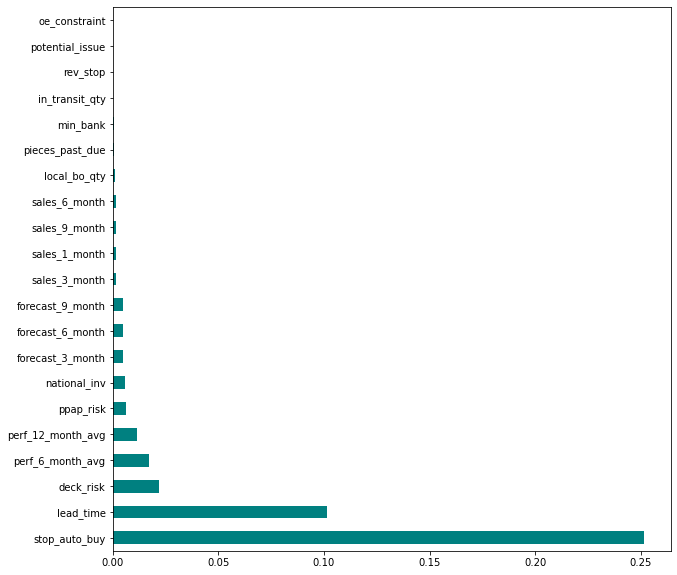

In [3]:
X = df.drop("went_on_backorder", axis=1)
Y = df["went_on_backorder"]

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, Y)

featureImportances = pd.Series(importances, X.columns)
featureImportances = featureImportances.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
featureImportances.plot(kind="barh", color="teal")